In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3310,ham,HI DARLIN HOW WAS WORK DID U GET INTO TROUBLE?...,NaN,NaN,NaN
4116,ham,Sure thing big man. i have hockey elections at...,NaN,NaN,NaN
489,ham,I think i've fixed it can you send a test mess...,NaN,NaN,NaN
1087,ham,You can never do NOTHING,NaN,NaN,NaN
1707,ham,Was doing my test earlier. I appreciate you. W...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
296,ham,Unless it's a situation where YOU GO GURL woul...
1338,ham,Aight sorry I take ten years to shower. What's...
4364,ham,Ujhhhhhhh computer shipped out with address to...
3312,ham,"Huh... Hyde park not in mel ah, opps, got conf..."
4942,ham,Check mail.i have mailed varma and kept copy t...


In [8]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1321,ham,"I wake up long ago already... Dunno, what othe..."
4500,ham,So wat's da decision?
1767,ham,"K, want us to come by now?"
1270,ham,"Sorry chikku, my cell got some problem thts y ..."
5194,ham,Ok... Take ur time n enjoy ur dinner...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()


403

In [12]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

2. EDA

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

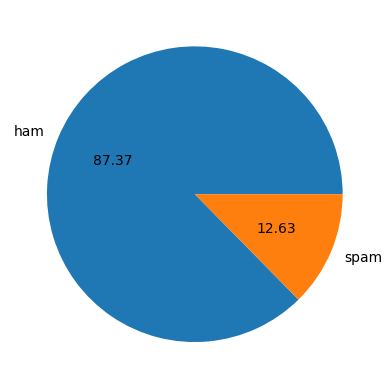

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PCC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PCC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot: xlabel='num_characters', ylabel='Count'>

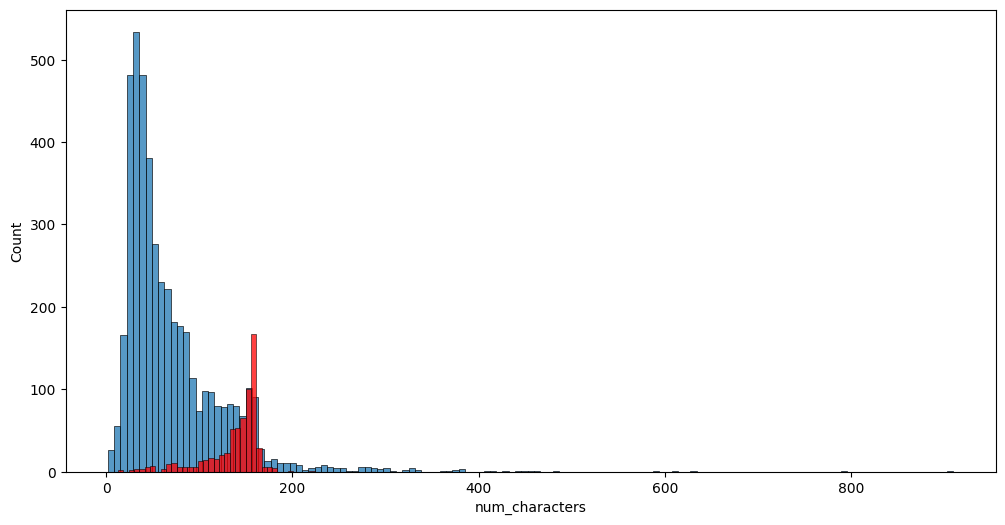

In [24]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

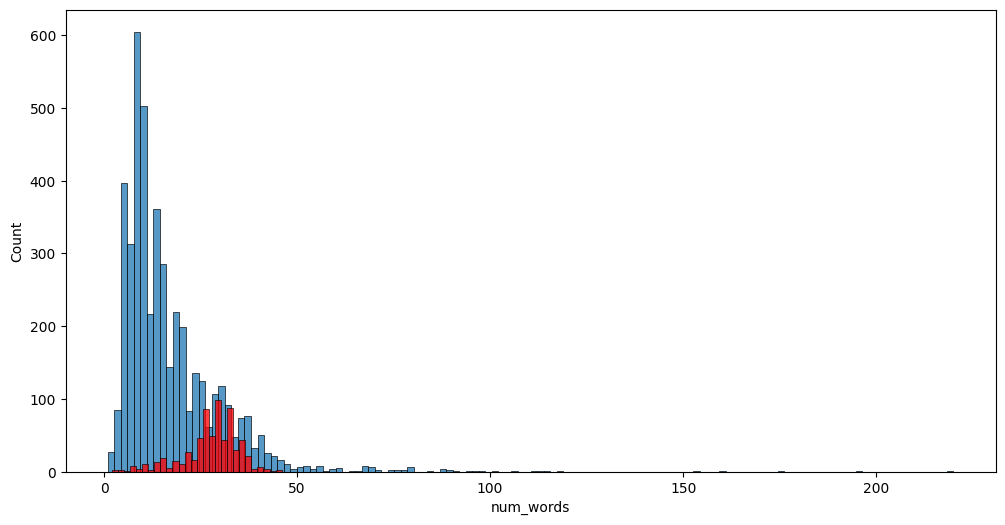

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

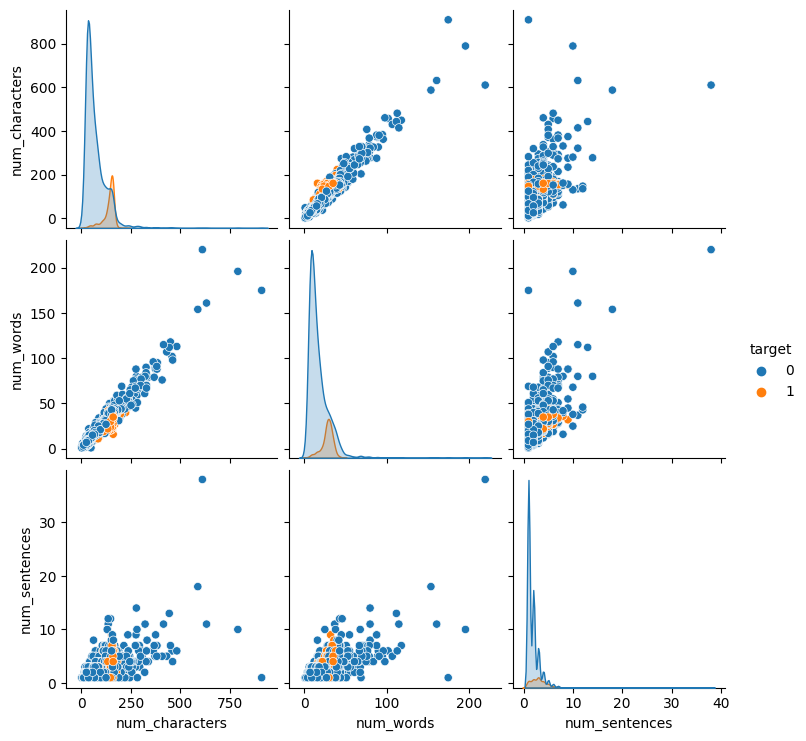

In [26]:
sns.pairplot(df,hue='target')

C:\Users\PCC\AppData\Local\Temp\ipykernel_8836\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

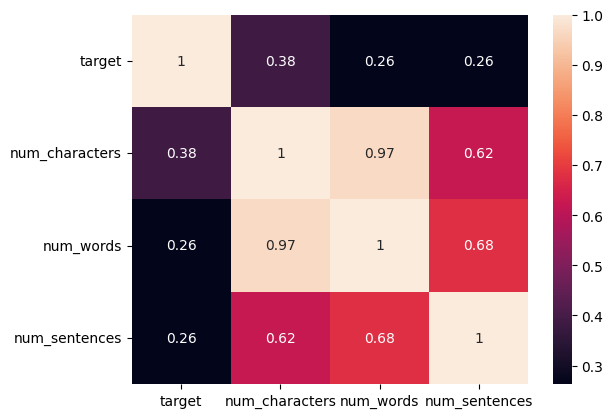

In [27]:
sns.heatmap(df.corr(),annot=True)

3. Data preprocessing

In [28]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [29]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [30]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [31]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

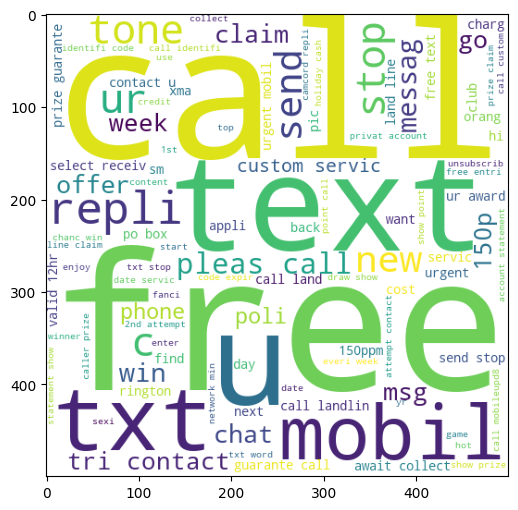

In [33]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

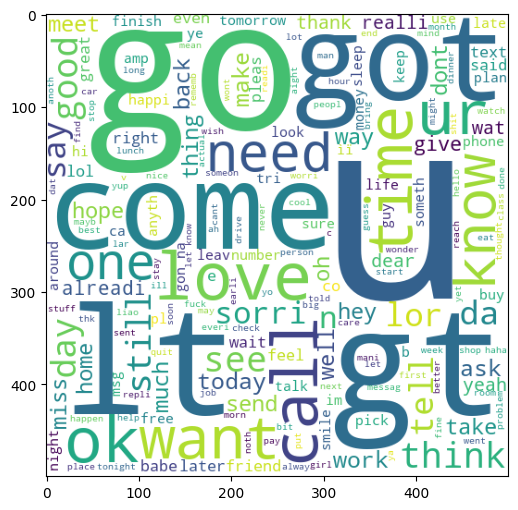

In [34]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [35]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

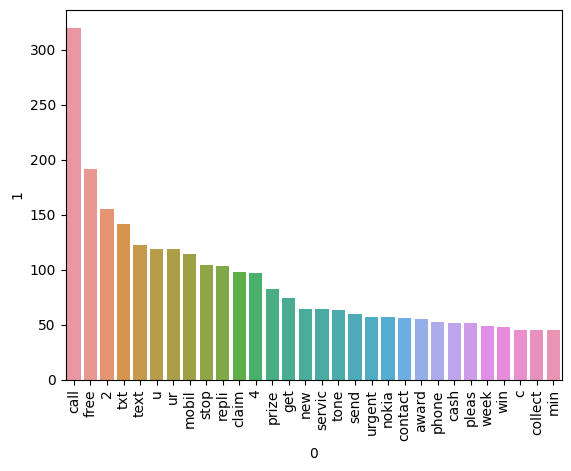

In [36]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [37]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

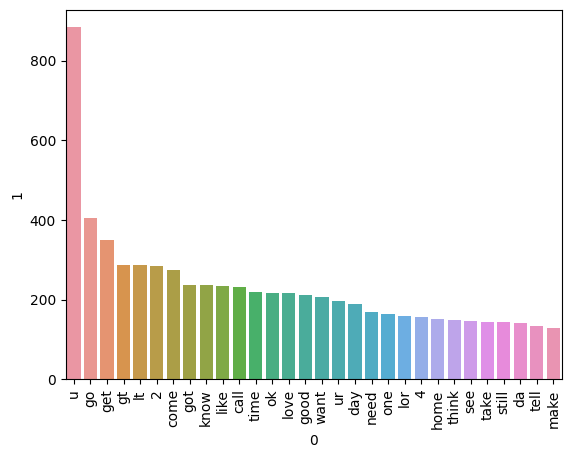

In [38]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

4. Model Building

In [39]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [40]:
X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()
X_tfidf.shape

(5169, 3000)

In [41]:
X_bow = cv.fit_transform(df['transformed_text']).toarray()
X_bow.shape

(5169, 6708)

In [42]:
y = df['target'].values

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score

In [44]:
mnb = MultinomialNB()
svc = SVC(kernel='linear')

In [45]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

In [46]:
scorings = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
}

In [47]:
def train_classifier(clf, X):
    scores = cross_validate(clf, X, y, cv=kfold, scoring=scorings)
    accuracy = scores['test_accuracy'].mean()
    precision = scores['test_precision'].mean()
    recall = scores['test_recall'].mean()
    
    return accuracy,precision,recall

In [48]:
accuracy_scores = []
precision_scores = []
recall_scores = []
clfs = {
    'NB + TF-IDF': mnb, 
    'NB + BOW': mnb,
    'SVM + TF-IDF' : svc, 
    'SVM + BOW' : svc,
}

In [49]:
current_accuracy,current_precision,current_recall = train_classifier(mnb, X_tfidf)
print("For NB + TF-IDF")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)

For NB + TF-IDF
Accuracy -  0.9754295803157751
Precision -  0.994153846153846
Recall -  0.8101864801864803


In [50]:
current_accuracy,current_precision,current_recall = train_classifier(mnb, X_bow)
print("For NB + BoW")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)

For NB + BoW
Accuracy -  0.9738821915343439
Precision -  0.877184073967935
Recall -  0.9234498834498834


In [51]:
current_accuracy,current_precision,current_recall = train_classifier(svc, X_tfidf)
print("For SVM + TF-IDF")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)

For SVM + TF-IDF
Accuracy -  0.9812330379500098
Precision -  0.9811027356323466
Recall -  0.8681818181818182


In [52]:
current_accuracy,current_precision,current_recall = train_classifier(svc, X_bow)
print("For SVM + BoW")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)

For SVM + BoW
Accuracy -  0.9787192808840508
Precision -  0.9725885149663952
Recall -  0.856107226107226


In [57]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores})
performance_df

,Algorithm,Accuracy,Precision,Recall
0,NB + TF-IDF,0.975430,0.994154,0.810186
1,NB + BOW,0.973882,0.877184,0.923450
2,SVC + TF-IDF,0.981233,0.981103,0.868182
3,SVC + BOW,0.978719,0.972589,0.856107


In [58]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,NB + TF-IDF,Accuracy,0.975430
1,NB + BOW,Accuracy,0.973882
2,SVC + TF-IDF,Accuracy,0.981233
3,SVC + BOW,Accuracy,0.978719
4,NB + TF-IDF,Precision,0.994154
5,NB + BOW,Precision,0.877184
6,SVC + TF-IDF,Precision,0.981103
7,SVC + BOW,Precision,0.972589
8,NB + TF-IDF,Recall,0.810186
9,NB + BOW,Recall,0.923450


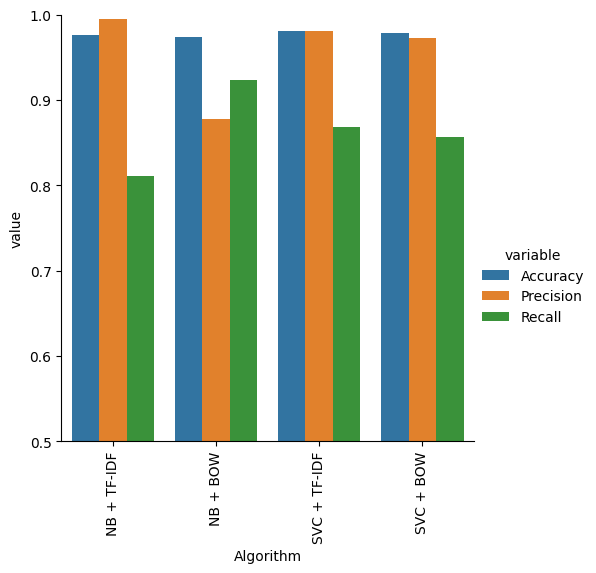

In [59]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('modelMNB.pkl','wb'))
pickle.dump(svc,open('modelSVM.pkl','wb'))